<a href="https://colab.research.google.com/github/keshav-b/ML-DL-stuff/blob/master/AutoEncoders/MNIST_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

import cv2

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
## PRE_PROCESS
def pre_process(x):
  x = x/255.0                       # normalise
  x = x.reshape((len(x), 28*28))    # converting into 1D
  return x

x_train = pre_process(X_train)
x_test = pre_process(X_test)  
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [ ]:
## AE Model

# Dimentions
input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256                  

# encoder
input_layer = Input(shape=(input_dim, ), name="INPUT")
hidden_layer_1 = Dense(hidden_dim, activation='relu', name='HIDDEN_1')(input_layer)

# code
code_layer = Dense(encode_dim, activation='relu', name="CODE")(hidden_layer_1)

# decoder
hidden_layer_2 = Dense(hidden_dim, activation='relu', name='HIDDEN_2')(code_layer)
output_layer = Dense(output_dim, activation='sigmoid', name="OUTPUT")(hidden_layer_2)

In [ ]:
model = Model(input_layer, output_layer)
model.compile(optimizer="Adam", loss='binary_crossentropy')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
CODE (Dense)                 (None, 100)               25700     
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 256)               25856     
_________________________________________________________________
OUTPUT (Dense)               (None, 784)               201488    
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1607
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0829
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0744
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0730
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0717
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0711
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0705
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0700
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0698


In [ ]:
decoded_data = model.predict(x_test)

In [27]:
get_encoded_data = Model(inputs=model.input, outputs=model.get_layer("CODE").output)

encoded_data = get_encoded_data.predict(x_test)

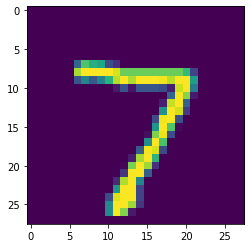

In [31]:
plt.imshow(X_test[0])

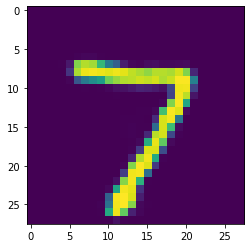

In [41]:
decode0 = decoded_data[0].reshape((28,28))
plt.imshow(decode0)